먼저 GPU를 선택하기 위해서, 수정 -> 노트 설정 -> 하드웨어 가속기를 GPU로 선택한다.

In [1]:
!nvidia-smi

Sat Sep 28 22:01:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0              46W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

관리를 위해서 HOME에 yolov9 설정

In [2]:
import os, glob
from IPython.display import Image
from google.colab import drive, userdata


HOME = os.getcwd()
YOLO = os.path.join(HOME, 'yolov9')
print(HOME)
print(YOLO)

/content
/content/yolov9


In [17]:
# 구글 드라이브 마운트
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


YOLOv9 github Clone

In [4]:
!git clone https://github.com/WongKinYiu/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 781, done.
remote: Total 781 (delta 0), reused 0 (delta 0), pack-reused 781 (from 1)
Receiving objects: 100% (781/781), 3.27 MiB | 37.20 MiB/s, done.
Resolving deltas: 100% (331/331), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


경량화 모델 weight 다운로드

In [5]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!ls -la {HOME}/weights

total 50312
drwxr-xr-x 2 root root     4096 Sep 28 22:02 .
drwxr-xr-x 1 root root     4096 Sep 28 22:02 ..
-rw-r--r-- 1 root root 51508261 Feb 18  2024 gelan-c.pt


샘플 이미지 확인

In [6]:
!ls -la {HOME}/yolov9/data/images

total 140
drwxr-xr-x 2 root root   4096 Sep 28 22:02 .
drwxr-xr-x 4 root root   4096 Sep 28 22:02 ..
-rw-r--r-- 1 root root 133495 Sep 28 22:02 horses.jpg


c 모델로 추론 해보기

In [7]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source {HOME}/yolov9/data/images/horses.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/yolov9/data/images/horses.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release

In [8]:
!ls -la {HOME}/yolov9/runs/detect

total 12
drwxr-xr-x 3 root root 4096 Sep 28 22:02 .
drwxr-xr-x 3 root root 4096 Sep 28 22:02 ..
drwxr-xr-x 2 root root 4096 Sep 28 22:02 exp


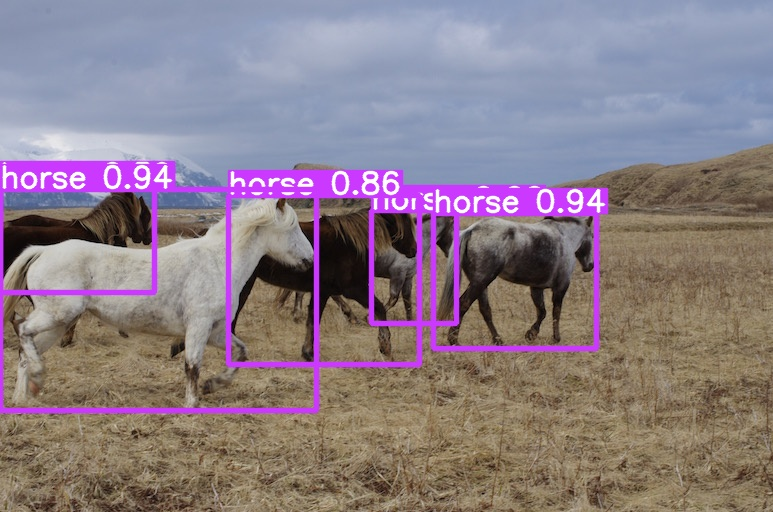

In [9]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/detect/exp/horses.jpg", width=600)

커스텀 COCO 데이터셋 학습

In [10]:
%cd {HOME}/yolov9

!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/data/coco.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-09-28 22:03:20.032309: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-28 22:03:20.050055: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-28 22:03:20.071335: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-28 22:03:20.077751: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-28 22:03:20.093191: I tensorflow/core/platform/

### 학습 결과

디폴트로 {HOME}/yolov9/runs/train/에 exp, exp2, exp3, ... 순서로 1씩 증가된 값으로 저장된다. 마지막 exp?가 최근 학습한 모델이다. --name 파라미터를 사용해서 덮어쓸 수 도 있다.

In [11]:
!ls {HOME}/yolov9/runs/train

exp


In [12]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    labels_correlogram.jpg  PR_curve.png  weights
events.out.tfevents.1727561002.4e251f1077dd.1665.0  labels.jpg		    R_curve.png
F1_curve.png					    opt.yaml		    results.csv
hyp.yaml					    P_curve.png		    results.png


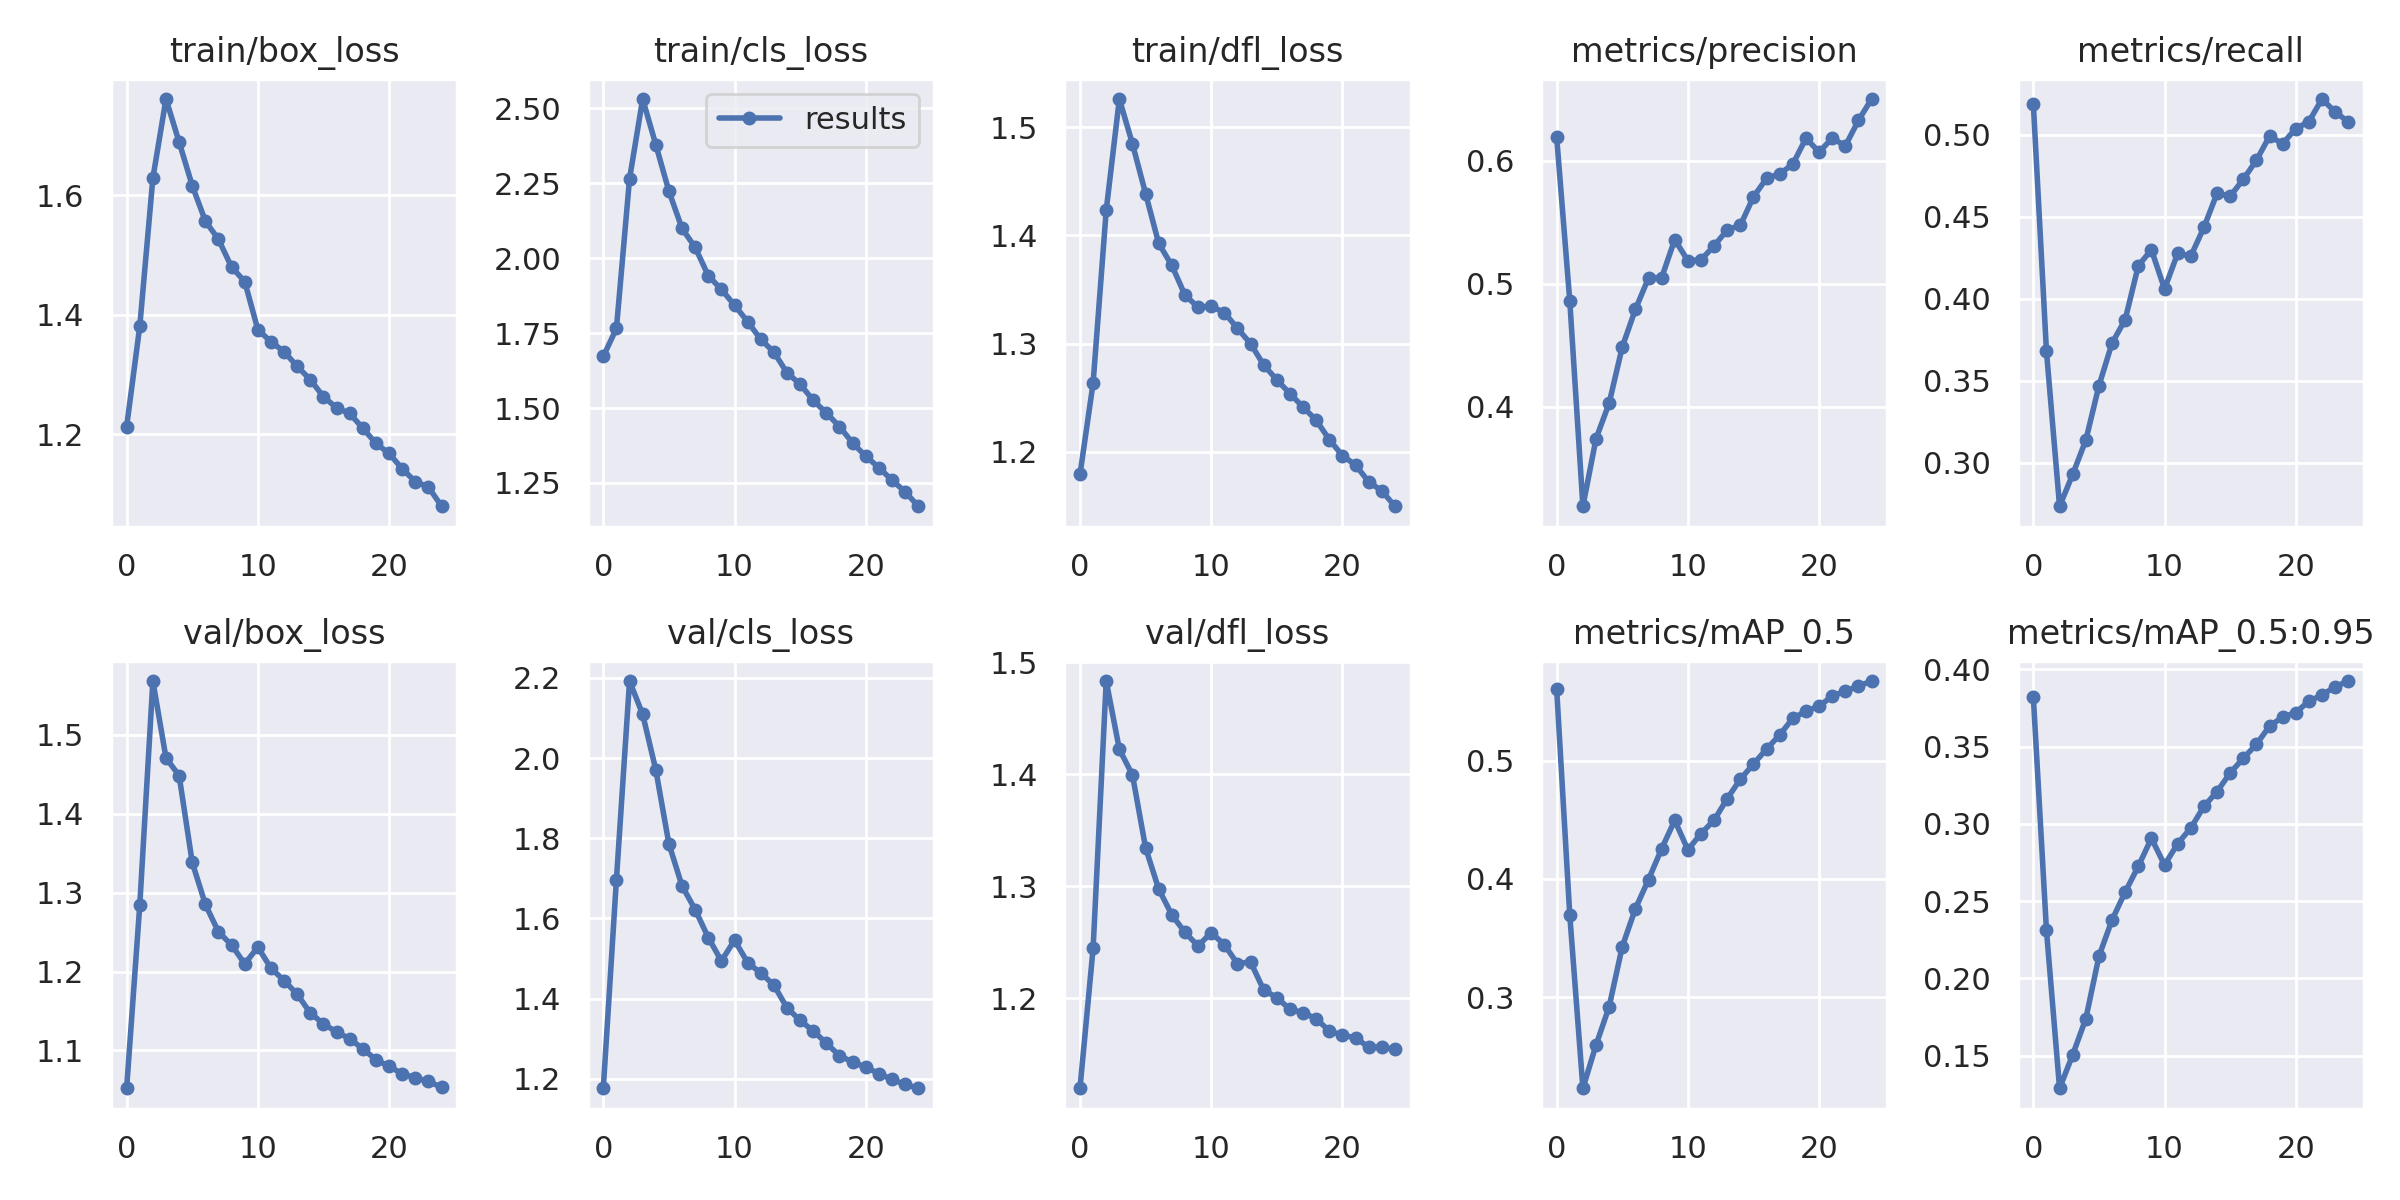

In [13]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

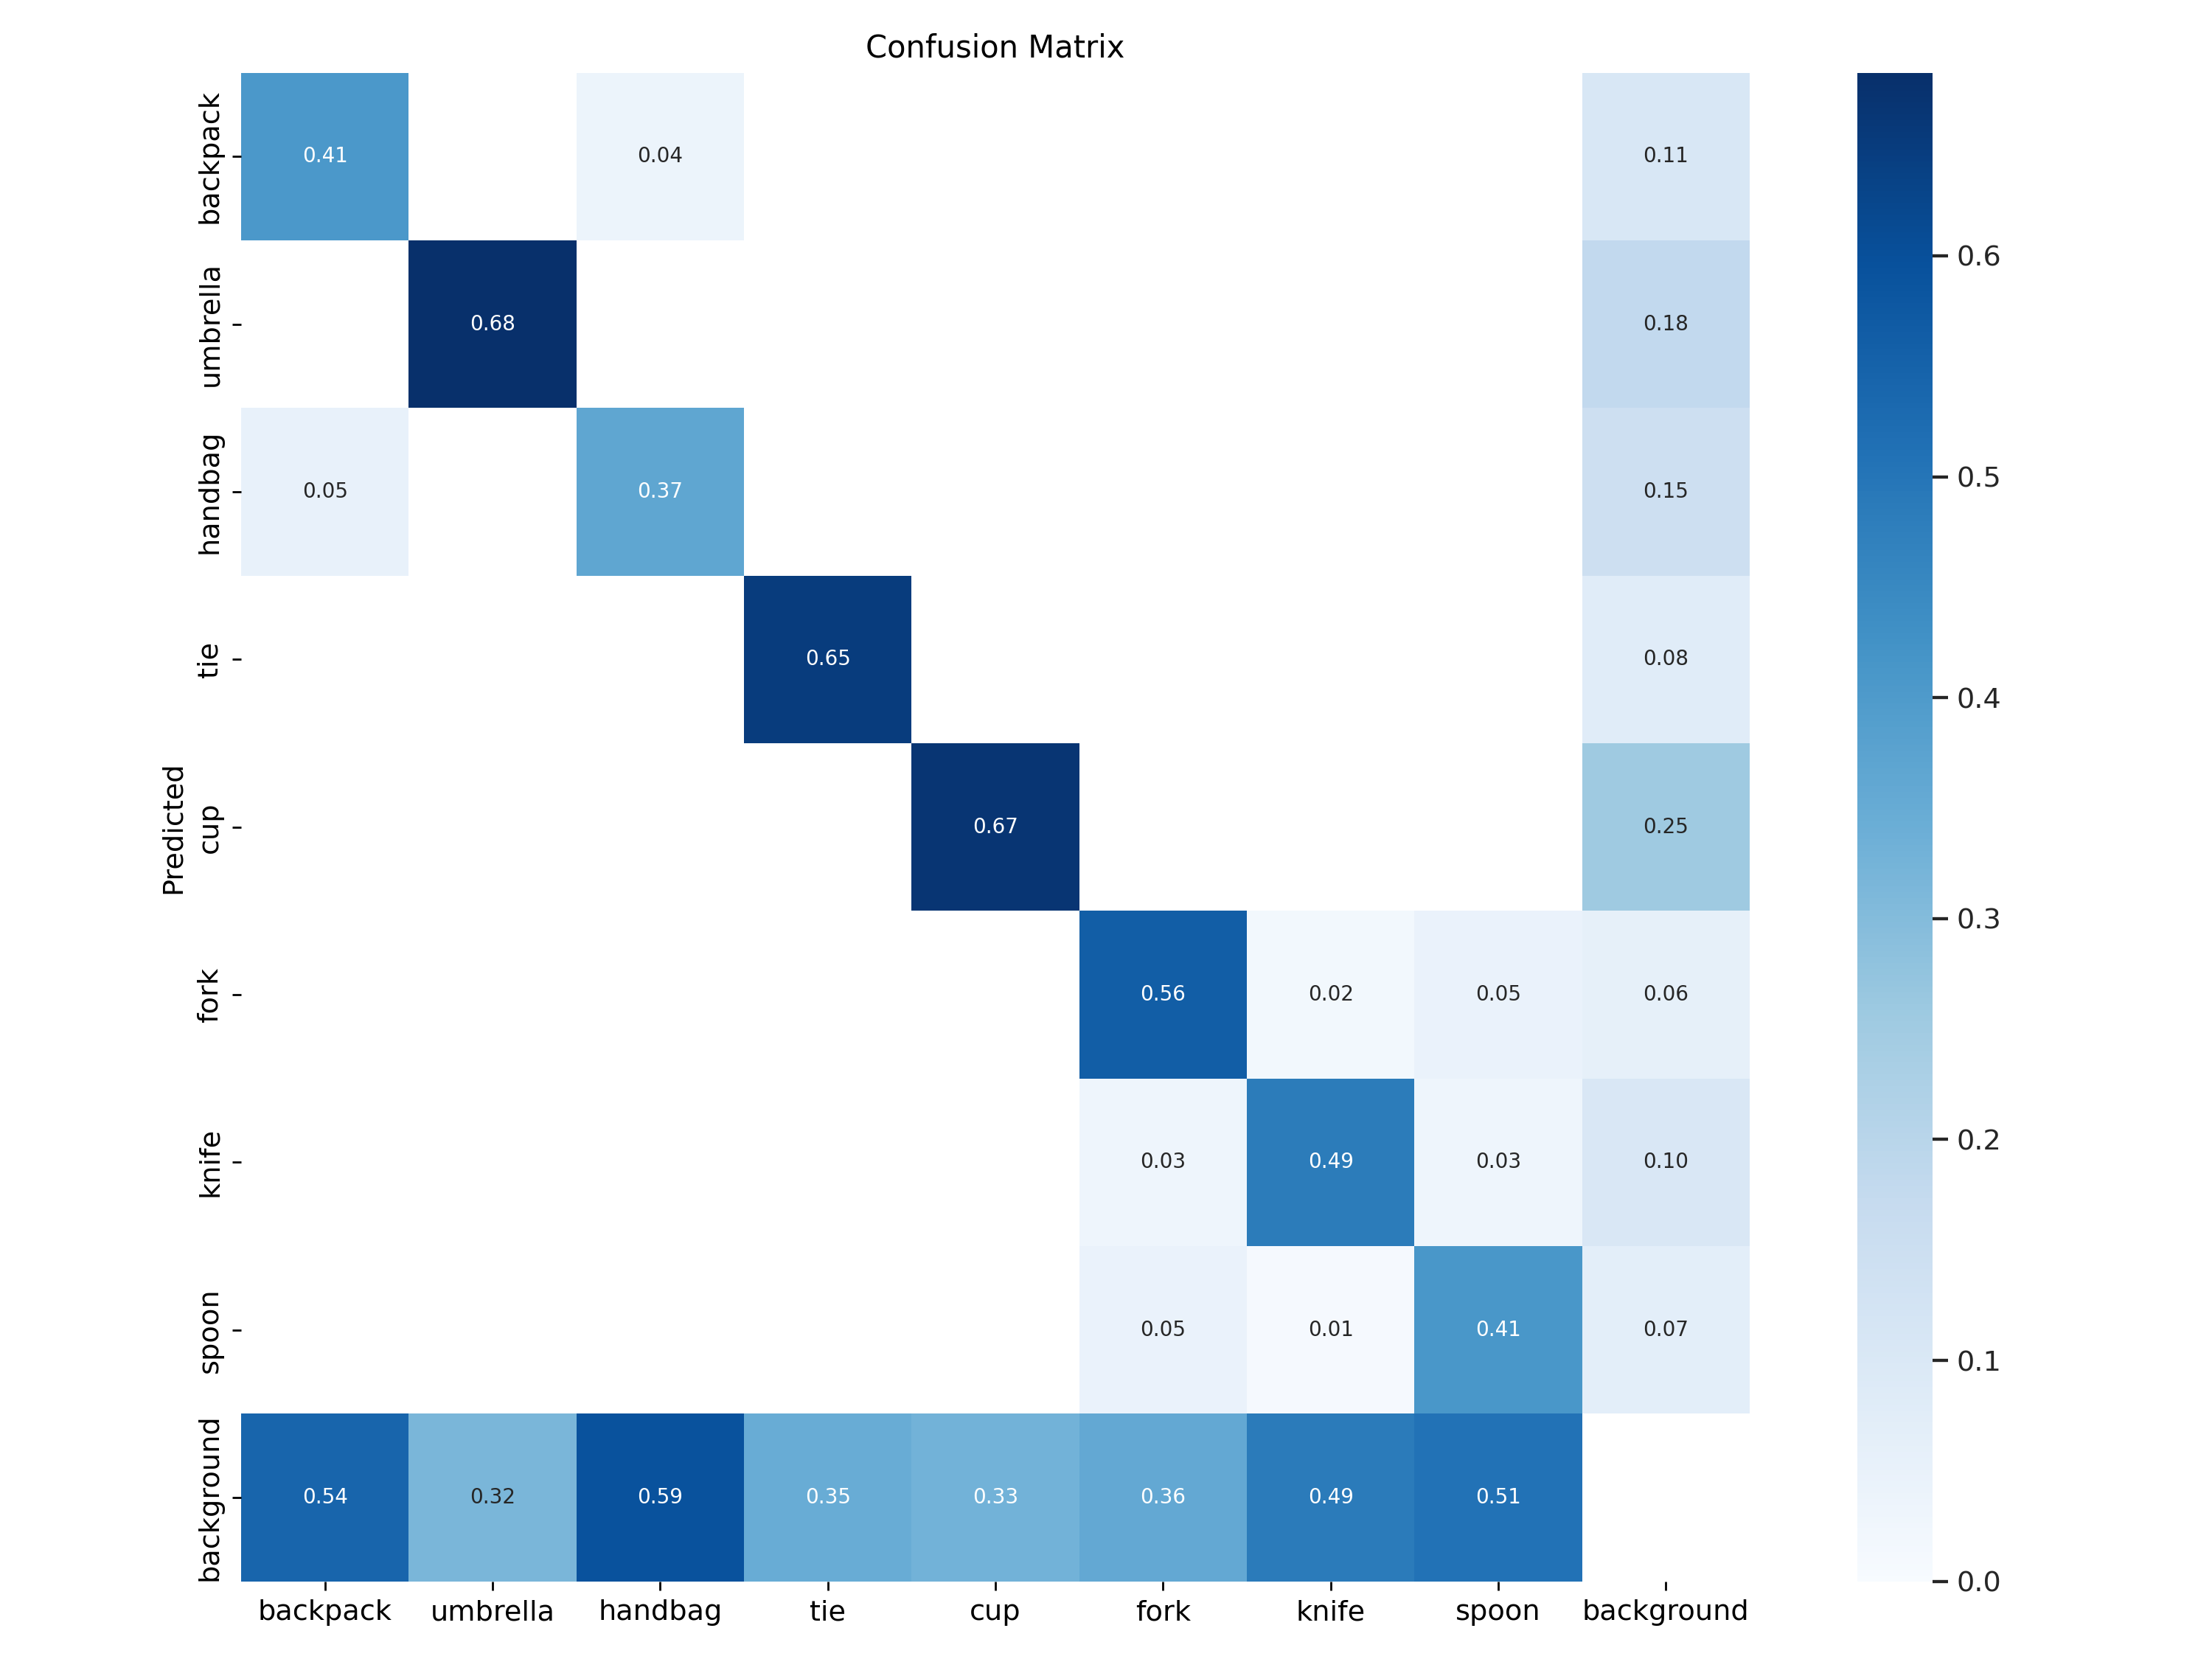

In [14]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

### 모델 복사

In [18]:
!mkdir /content/drive/MyDrive/data/bin

mkdir: cannot create directory ‘/content/drive/MyDrive/data/bin’: File exists


In [19]:
!cp  {HOME}/yolov9/runs/train/exp/weights/best.pt /content/drive/MyDrive/data/bin/

### 모델 테스트

In [20]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source /content/drive/MyDrive/data/coco/images/test/

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/data/coco/images/test/, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-104-g5b1ea9a Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

/content/yolov9/models/experimental.py:243: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more d

In [21]:
!ls {HOME}/yolov9/runs/detect

exp  exp2


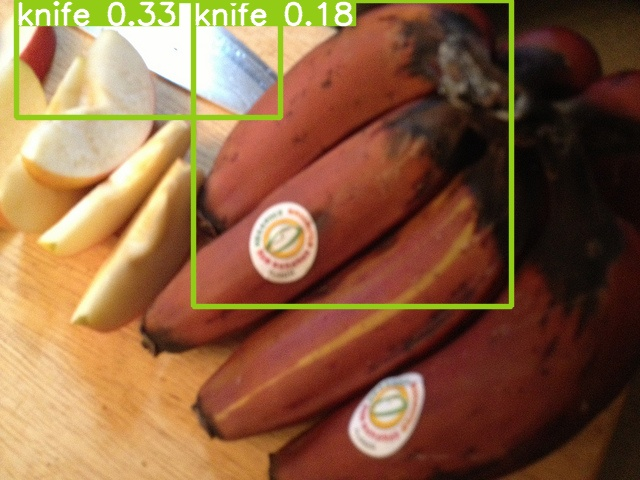

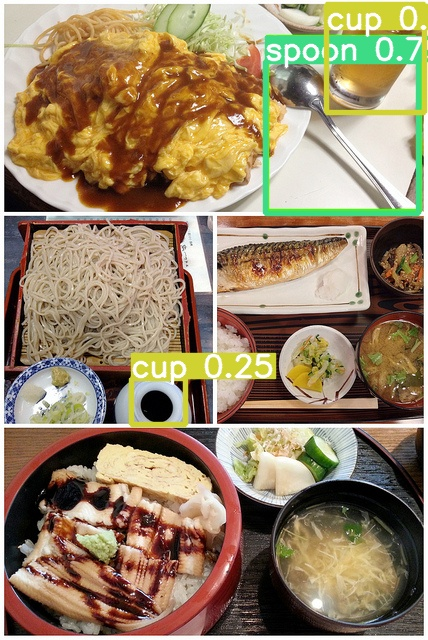

In [22]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))